# Exercise 10
### $\textit{Confidence intervals}$

Given is the likelihood function for a measured value $x$ at a given parameter $a$

$L(X;a) = \frac{1}{\pi} \frac{1}{1+(x-a)^2}$ mit $a > 0$.

(a) Using the Neyman construction, determine the central frequentist $90 \%$ confidence interval for $a$
when a value $𝑥 = 10$ was measured.

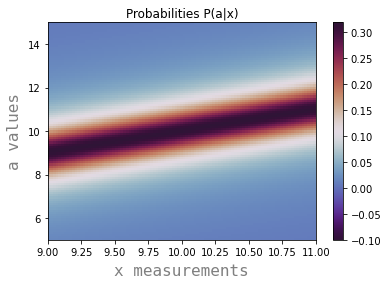

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

x, a = np.meshgrid(np.linspace(9, 11, 100), np.linspace(5, 15, 100))
z = 1/(np.pi *(1+(x-a)**2))

z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, a, z, cmap='twilight_shifted', vmin=-0.1, vmax=z_max)
ax.set_title('Probabilities P(a|x)')

ax.axis([x.min(), x.max(), a.min(), a.max()])


fig.colorbar(c, ax=ax)
plt.xlabel("x measurements", 
           family='monospace', 
           color='grey', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("a values", 
           family='monospace', 
           color='grey', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.show()

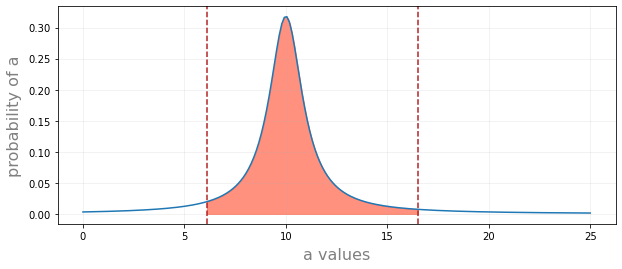

89.99998998663591

In [221]:
def f(n, x=10):
    return 1/(np.pi *(1+(x-n)**2))

plt.figure(figsize=(10, 4))

b = np.linspace(0, 25, 200)
plt.plot(b,f(b)) 
plt.xlabel("a values", 
           color='grey', 
           weight='normal', 
           size = 16,
           labelpad = 6)
plt.ylabel("probability of a", 
           color='grey', 
           weight='normal', 
           size = 16,
           labelpad = 6)

k = np.arange( 6.11232,16.524001,0.1)

plt.fill_between(k, f(k), color='tomato', alpha=.7)
plt.grid( alpha=.2)

plt.axvline(x=6.11232, color='firebrick', linestyle='dashed')
plt.axvline(x=16.524001, color='firebrick', linestyle='dashed')

plt.show()

I = quad(f, 0, np.inf)
I_005 = I[0]*0.05
I_unten = quad(f, 0, 6.11232)
I_oben = quad(f, 16.524001, np.inf)
I_ = quad(f, 6.11232, 16.524001)
Iges = I_[0]/0.9682744825694454 * 100 #normieren

Iges

The interval for which the parameter $a$ lies in with $90\%$ confidence for the measured $x$ value of $10$ is $a\in [6.11232, 16.524001]$.